PROGRAM 1- COLOR COMPRESSION USING K-MEANS

In [14]:
pip install opencv-python

In [0]:
# Importing Libraries
%matplotlib inline                  
import matplotlib.pyplot as plt                   #For plotting framework
import numpy as np                                #For accessing all sub-modules and functions
import cv2                                        #For importing images using OpenCV
import os                                         #For OS dependent functionality
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans

A. CODE FOR LOADING THE GIVEN PICTURE AND REPORTING THE IMAGE ALSO THE SIZE OF THE IMAGE

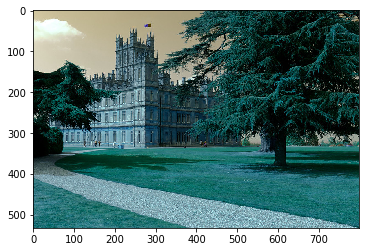

In [16]:
#Loading the image using OpenCV
image = cv2.imread("Picture.jpg")
#Reporting  the image
plt.imshow(image)
plt.show()

In [17]:
#Size of the image
image_size='Picture.jpg'
og_size = os.path.getsize(image_size)
print('The image size is  :',round(og_size/1024),'KB')

The image size is  : 223 KB


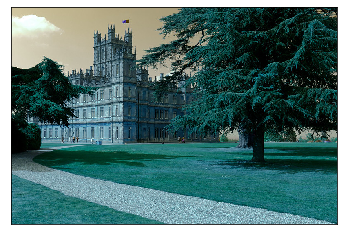

In [18]:
image = cv2.imread("Picture.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image);

In [27]:
print(image.shape)

(533, 799, 3)


In [20]:
#pixel of the image
print('pixel of the image')
print(image.size)

pixel of the image
1277601


In [21]:
#reshape the image to a 2D matrix of size [number of pixels x number of channels].
data_picture = image / 255.0 
data_picture = data_picture.reshape(533 * 799, 3)
data_picture.shape

(425867, 3)

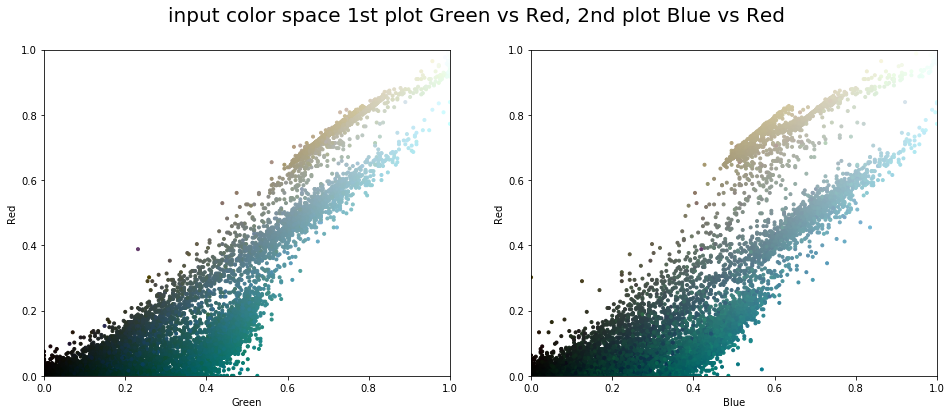

In [22]:

#Visualising the color space using 10000pixels and plotting Green vs Red and Blue vs Red colorspace as input
def plot_pixels(data_picture, title, colors=None, N=10000):
    if colors is None:
        colors = data_picture
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data_picture.shape[0])[:N]
    colors = colors[i]
    R, G, B = data_picture[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(G, R, color=colors, marker='.')
    ax[0].set(xlabel='Green', ylabel='Red', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(B, R, color=colors, marker='.')
    ax[1].set(xlabel='Blue', ylabel='Red', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

plot_pixels(data_picture, title='input color space 1st plot Green vs Red, 2nd plot Blue vs Red')

Now reduce all the millions of colors (in original pixel space) to just K colors, where K = 8

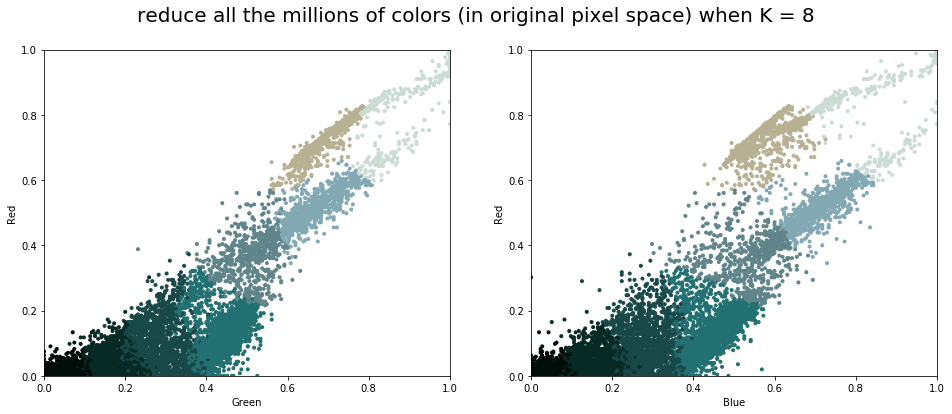

In [23]:
kmeans = MiniBatchKMeans(8)
kmeans.fit(data_picture)
colors1 = kmeans.cluster_centers_[kmeans.predict(data_picture)]

plot_pixels(data_picture, colors=colors1,title="reduce all the millions of colors (in original pixel space) when K = 8")

Now reduce all the millions of colors (in original pixel space) to just K colors, where K = 16

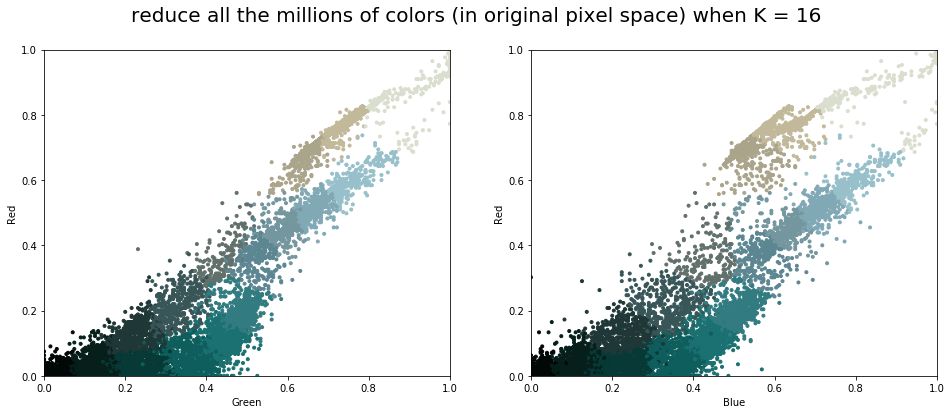

In [24]:
kmeans = MiniBatchKMeans(16)
kmeans.fit(data_picture)
colors2 = kmeans.cluster_centers_[kmeans.predict(data_picture)]
plot_pixels(data_picture, colors=colors2,title="reduce all the millions of colors (in original pixel space) when K = 16")

color compressed 8-color images to the original image 

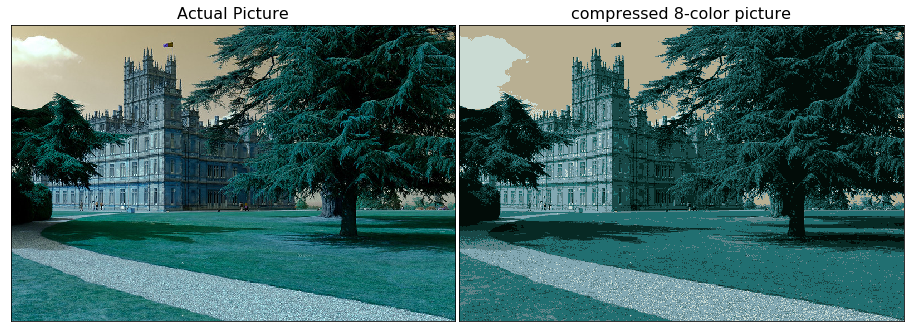

In [25]:
compressed_picture = colors1.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.01)
ax[0].imshow(image)
ax[0].set_title('Actual Picture', size=16)
ax[1].imshow(compressed_picture)
ax[1].set_title('compressed 8-color picture', size=16);


color compressed 16-color images to the original image 

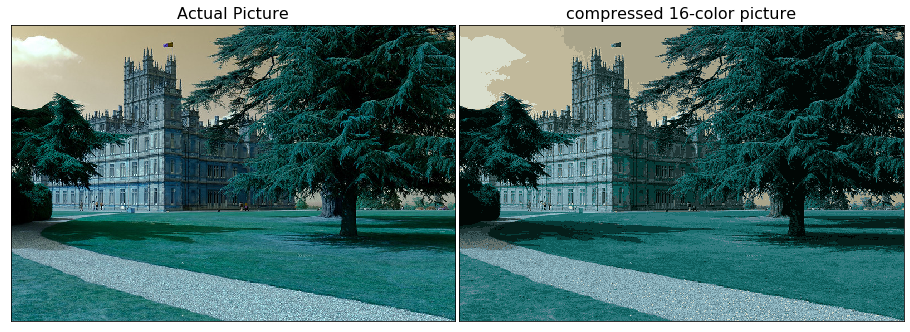

In [26]:
compressed_picture = colors2.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.01)
ax[0].imshow(image)
ax[0].set_title('Actual Picture', size=16)
ax[1].imshow(compressed_picture)
ax[1].set_title('compressed 16-color picture', size=16);
